In [47]:
import glob
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

training_path = "F:/Sonstiges/ml/FEMTOBearingDataSet/Learning_set/Bearing1_1"
test_path = "F:/Sonstiges/ml/FEMTOBearingDataSet/Test_set/Bearing1_3"


In [48]:
# import training data

all_files = glob.glob(training_path + "/acc*.csv")

dataFrames = []

for filename in all_files :
    frame = pd.read_csv(filename, usecols=[4,5], header=None)
    dataFrames.append(frame)

rawTrainData = pd.concat(dataFrames)
rawTrainData = rawTrainData.to_numpy()

rawTrainData.shape

(7175680, 2)

In [49]:
# import test data

all_files = glob.glob(test_path + "/acc*.csv")

dataFrames = []

for filename in all_files :
    frame = pd.read_csv(filename, usecols=[4,5], header=None)
    dataFrames.append(frame)

rawTestData = pd.concat(dataFrames)
rawTestData = rawTestData.to_numpy()

rawTestData.shape

(4613120, 2)

In [50]:
def calculate_difference(data):
    differences = []

    for index, obj in enumerate(iterable=data):
        if index > 0:
            diff0 = obj[0] - data[index - 1, 0]
            diff1 = obj[1] - data[index - 1, 1]
            differences.append((diff0,diff1))
        else:
            differences.append((obj[0],obj[1]))
    
    difference_array = np.vstack(differences)
    difference_array = np.absolute(difference_array)
    return difference_array

In [51]:
diffTrainData = calculate_difference(data=rawTrainData)
diffTestData = calculate_difference(data=rawTestData)

In [52]:
#Normalise the data to a scale between 0 and 1

normaliser = MinMaxScaler(feature_range=(0,1))
trainingData = normaliser.fit_transform(diffTrainData)
testData = normaliser.fit_transform(diffTestData)

In [53]:
# Create x_values based on the number of time steps

def get_x_values(number_of_samples):
    li = []

    for i in range(1, number_of_samples + 1):
        li.append(i)
        
    arr = np.vstack(li)
    #print(arr.shape)
    #arr.reshape(-1, 1)
    #print(arr.shape)
    return arr

In [54]:
x_train = get_x_values(trainingData.shape[0])
y_train = trainingData[:,:]

x_test = get_x_values(testData.shape[0])
y_test = testData[:,:]

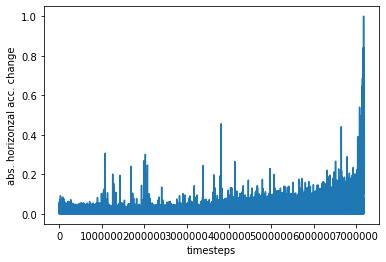

In [55]:
plt.plot(x_train,y_train[:,0])
plt.ylabel("abs. horizonzal acc. change")
plt.xlabel("timesteps")
plt.show()

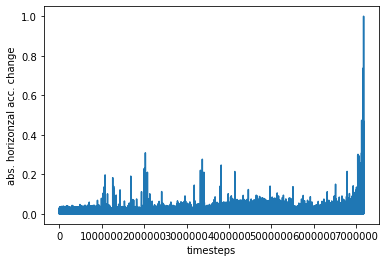

In [56]:
plt.plot(x_train,y_train[:,1])
plt.ylabel("abs. horizonzal acc. change")
plt.xlabel("timesteps")
plt.show()

In [57]:
# Fit linear regression to difference data
regressor = LinearRegression()

regressor.fit(x_train,y_train)
pred = regressor.predict(x_test[:,:])
mse = mean_squared_error(y_test,pred)

print("Mean squared error:", mse )
print("R^2 score: ", r2_score(y_test,pred))

Mean squared error: 0.0005309853977980509
R^2 score:  -0.5825687782162006


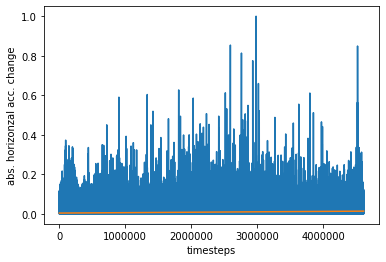

In [58]:
# Regression line in orange

plt.plot(x_test,y_test[:,0])
plt.plot(x_test,pred[:,0])
plt.ylabel("abs. horizonzal acc. change")
plt.xlabel("timesteps")
plt.show()

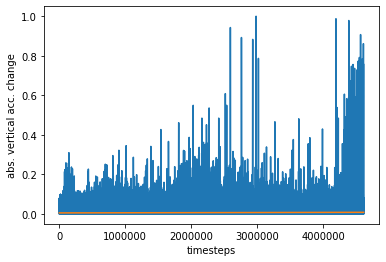

In [59]:
# Regression line in orange

plt.plot(x_test,y_test[:,1])
plt.plot(x_test,pred[:,1])
plt.ylabel("abs. vertical acc. change")
plt.xlabel("timesteps")
plt.show()

In [60]:
# normalise absolute values between -1 and 1

normaliser = MinMaxScaler(feature_range=(-1,1))
trainingData = normaliser.fit_transform(rawTrainData)
testData = normaliser.fit_transform(rawTestData)

In [61]:
# prepare data

x_train = get_x_values(trainingData.shape[0])
y_train = trainingData[:,:]

x_test = get_x_values(testData.shape[0])
y_test = testData[:,:]

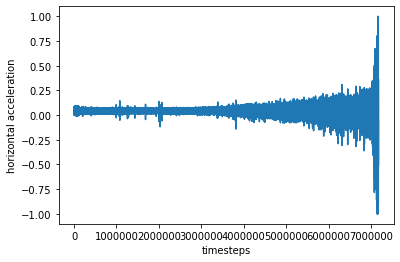

In [62]:
plt.plot(x_train,y_train[:,0])
plt.ylabel("horizontal acceleration")
plt.xlabel("timesteps")
plt.show()

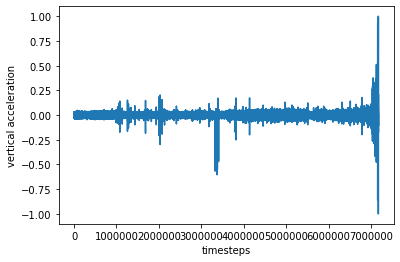

In [63]:
plt.plot(x_train,y_train[:,1])
plt.ylabel("vertical acceleration")
plt.xlabel("timesteps")
plt.show()

In [64]:
# Fit linear regression to data with absolute values
regressor = LinearRegression()

regressor.fit(x_train,y_train)
pred = regressor.predict(x_test[:,:])
mse = mean_squared_error(y_test,pred)

print("Mean squared error:", mse )
print("R^2 score: ", r2_score(y_test,pred))

Mean squared error: 0.15435370954121513
R^2 score:  -149.24214706786472


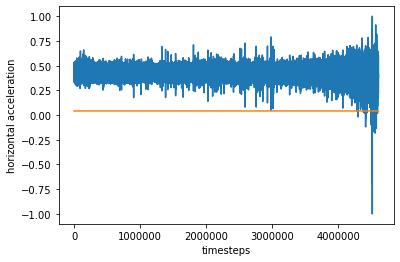

In [65]:
# Regression line in orange

plt.plot(x_test,y_test[:,0])
plt.plot(x_test,pred[:,0])
plt.ylabel("horizontal acceleration")
plt.xlabel("timesteps")
plt.show()

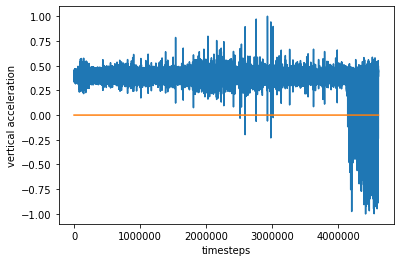

In [66]:
# Regression line in orange

plt.plot(x_test,y_test[:,1])
plt.plot(x_test,pred[:,1])
plt.ylabel("vertical acceleration")
plt.xlabel("timesteps")
plt.show()